# We will build a regression model that predicts whether an NBA players stays 5 or more years given his rookie stats

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [107]:
player_data = pd.read_csv('player_data.csv')
## We will only use players who started before 2014
player_data = player_data[player_data['year_start'] < 2014]
player_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


Once again, college and birth_date won't matter for our analysis.  

In [101]:
player_data.drop(['college','birth_date'],inplace = True, axis = 1)
player_data.head()

,name,year_start,year_end,position,height,weight
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0


We will make a coloumn that displays whether a player has lasted 5 years or more and change the height to total inches.

In [108]:
player_data['5_Years?'] = player_data.apply(lambda x: int(x['year_end'] - x['year_start'] >= 5),axis = 1)
player_data = player_data[player_data['height'].notnull()]
player_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college,5_Years?
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,0
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,1
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",1
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,1
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University,1


In [109]:
player_data['height'] = player_data.apply(lambda x: int(x['height'].split('-')[0])*12 + int(x['height'].split('-')[1]), axis = 1)
player_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college,5_Years?
0,Alaa Abdelnaby,1991,1995,F-C,82,240.0,"June 24, 1968",Duke University,0
1,Zaid Abdul-Aziz,1969,1978,C-F,81,235.0,"April 7, 1946",Iowa State University,1
2,Kareem Abdul-Jabbar,1970,1989,C,86,225.0,"April 16, 1947","University of California, Los Angeles",1
3,Mahmoud Abdul-Rauf,1991,2001,G,73,162.0,"March 9, 1969",Louisiana State University,1
4,Tariq Abdul-Wahad,1998,2003,F,78,223.0,"November 3, 1974",San Jose State University,1


In [110]:
season_stats = pd.read_csv('Seasons_Stats.csv')
season_stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


We will drop unnamed column and filter for players in the league after 1980.  

In [111]:
season_stats = season_stats[season_stats['Year'] > 1979]
season_stats.drop('Unnamed: 0', inplace = True, axis = 1)
season_stats.reset_index(inplace = True, drop = True)
season_stats.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
1,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,0.511,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
2,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,0.571,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
3,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,0.574,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
4,1980.0,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,0.524,...,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0


We alter the position column to only allow the 5 main positions. 

In [112]:
season_stats['Pos'] = season_stats['Pos'].apply(lambda x: x.split('-')[0])
season_stats.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
1,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,0.511,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
2,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,0.571,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
3,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,0.574,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
4,1980.0,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,0.524,...,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0


We will only consider base NBA stats in performing our analysis

In [121]:
#We will keep percentages over total considering a shortened season due to injury will impoact the model
data_to_keep = ['Year', 'Player', 'Pos', 'G','TRB','AST','STL','BLK','TOV','PTS','3P%','2P%']
season_stats = season_stats[data_to_keep]
season_stats.head(20)

,Year,Player,Pos,G,TRB,AST,STL,BLK,TOV,PTS,3P%,2P%
0,1980.0,Kareem Abdul-Jabbar*,C,82.0,886.0,371.0,81.0,280.0,297.0,2034.0,0.000,0.604
1,1980.0,Tom Abernethy,PF,67.0,191.0,87.0,35.0,12.0,39.0,362.0,0.000,0.483
2,1980.0,Alvan Adams,C,75.0,609.0,322.0,108.0,55.0,218.0,1118.0,0.000,0.533
3,1980.0,Tiny Archibald*,PG,80.0,197.0,671.0,106.0,10.0,242.0,1131.0,0.222,0.488
4,1980.0,Dennis Awtrey,C,26.0,115.0,40.0,12.0,15.0,27.0,86.0,NaN,0.450
5,1980.0,Gus Bailey,SG,20.0,28.0,26.0,7.0,4.0,11.0,38.0,1.000,0.441
6,1980.0,James Bailey,PF,67.0,197.0,28.0,21.0,54.0,79.0,312.0,NaN,0.450
7,1980.0,Greg Ballard,SF,82.0,638.0,159.0,90.0,36.0,133.0,1277.0,0.340,0.502
8,1980.0,Mike Bantom,SF,77.0,456.0,279.0,85.0,49.0,189.0,908.0,0.333,0.506
9,1980.0,Marvin Barnes,PF,20.0,77.0,18.0,5.0,12.0,18.0,64.0,NaN,0.400


We can infer based on the data that any player traded in season has split stats.  We will only record total year statistics and ignore split stats between teams.  Based on how the data is laid out, we can assume that first result for each player is his season statistic.  

In [122]:
def duplicate(row):
    index = int(row.name)
    if index == 0:
        return False
    return season_stats.iloc[index]['Player'] == season_stats.iloc[index - 1]['Player']
g = season_stats[season_stats.apply(lambda row: duplicate(row) == False, axis = 1)]
g.head(20)

,Year,Player,Pos,G,TRB,AST,STL,BLK,TOV,PTS,3P%,2P%
0,1980.0,Kareem Abdul-Jabbar*,C,82.0,886.0,371.0,81.0,280.0,297.0,2034.0,0.000,0.604
1,1980.0,Tom Abernethy,PF,67.0,191.0,87.0,35.0,12.0,39.0,362.0,0.000,0.483
2,1980.0,Alvan Adams,C,75.0,609.0,322.0,108.0,55.0,218.0,1118.0,0.000,0.533
3,1980.0,Tiny Archibald*,PG,80.0,197.0,671.0,106.0,10.0,242.0,1131.0,0.222,0.488
4,1980.0,Dennis Awtrey,C,26.0,115.0,40.0,12.0,15.0,27.0,86.0,NaN,0.450
5,1980.0,Gus Bailey,SG,20.0,28.0,26.0,7.0,4.0,11.0,38.0,1.000,0.441
6,1980.0,James Bailey,PF,67.0,197.0,28.0,21.0,54.0,79.0,312.0,NaN,0.450
7,1980.0,Greg Ballard,SF,82.0,638.0,159.0,90.0,36.0,133.0,1277.0,0.340,0.502
8,1980.0,Mike Bantom,SF,77.0,456.0,279.0,85.0,49.0,189.0,908.0,0.333,0.506
9,1980.0,Marvin Barnes,PF,20.0,77.0,18.0,5.0,12.0,18.0,64.0,NaN,0.400


Now that we have each NBA players's stats by season, we will merge year_start from previous dataset with this dataframe

In [131]:
df = pd.merge(g, player_data, left_on = ['Year', 'Player'], right_on = ['year_start', 'name'], how = 'inner')
df.drop(['year_start','year_end','name','position'],inplace=True,axis = 1)
df.head()

,Year,Player,Pos,G,TRB,AST,STL,BLK,TOV,PTS,3P%,2P%,height,weight,birth_date,college,5_Years?
0,1980,James Bailey,PF,67.0,197.0,28.0,21.0,54.0,79.0,312.0,NaN,0.450,81,220.0,"May 21, 1957",Rutgers University,1
1,1980,Lawrence Boston,PF,13.0,39.0,2.0,4.0,2.0,8.0,56.0,NaN,0.462,80,225.0,"May 18, 1956",University of Maryland,0
2,1980,Dudley Bradley,SG,82.0,223.0,252.0,211.0,48.0,166.0,688.0,0.4,0.452,78,195.0,"March 19, 1957",University of North Carolina,1
3,1980,Bill Cartwright,C,82.0,726.0,165.0,48.0,101.0,222.0,1781.0,NaN,0.547,85,245.0,"July 30, 1957",University of San Francisco,1
4,1980,Jeff Cook,PF,66.0,241.0,84.0,28.0,18.0,71.0,362.0,0.0,0.474,82,215.0,"October 21, 1956",Idaho State University,1


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2250 entries, 0 to 2249
Data columns (total 17 columns):
Year          2250 non-null object
Player        2250 non-null object
Pos           2250 non-null object
G             2250 non-null float64
TRB           2250 non-null float64
AST           2250 non-null float64
STL           2250 non-null float64
BLK           2250 non-null float64
TOV           2250 non-null float64
PTS           2250 non-null float64
3P%           1685 non-null float64
2P%           2231 non-null float64
height        2250 non-null int64
weight        2250 non-null float64
birth_date    2250 non-null object
college       2049 non-null object
5_Years?      2250 non-null int64
dtypes: float64(10), int64(2), object(5)
memory usage: 316.4+ KB


Let us analyze the null values for 2P% to see why it is unfilled.

In [133]:
print(df[df['2P%'].isnull()])

      Year            Player Pos    G  TRB  AST  STL  BLK  TOV  PTS  3P%  2P%  \
381   1986       Yvon Joseph   C  1.0  0.0  0.0  0.0  0.0  0.0  2.0  NaN  NaN   
608   1989        David Wood  PF  2.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  NaN   
764   1992       Steve Bardo  SG  1.0  1.0  0.0  0.0  0.0  0.0  0.0  NaN  NaN   
787   1992     Cedric Hunter  PG  1.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  NaN   
969   1995       Tom Hovasse  SF  2.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  NaN   
1075  1996       Larry Sykes  PF  1.0  2.0  0.0  0.0  0.0  1.0  0.0  NaN  NaN   
1089  1997       Bruce Bowen  SF  1.0  0.0  0.0  0.0  1.0  0.0  0.0  NaN  NaN   
1189  1998  Michael McDonald   C  1.0  1.0  0.0  0.0  0.0  2.0  0.0  NaN  NaN   
1278  1999     Tyson Wheeler  PG  1.0  0.0  2.0  0.0  0.0  0.0  4.0  1.0  NaN   
1282  1999     Trevor Winter   C  1.0  3.0  0.0  0.0  0.0  0.0  0.0  NaN  NaN   
1325  2000     Jason Miskiri  PG  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  NaN   
1387  2001        Andy Panko

As we can see from this data, players who haven't played many games usually have NaN values for 2P%.  We will drop players with less than 10 games played

In [134]:
df = df[df['G'] > 10]
df.head()

,Year,Player,Pos,G,TRB,AST,STL,BLK,TOV,PTS,3P%,2P%,height,weight,birth_date,college,5_Years?
0,1980,James Bailey,PF,67.0,197.0,28.0,21.0,54.0,79.0,312.0,NaN,0.450,81,220.0,"May 21, 1957",Rutgers University,1
1,1980,Lawrence Boston,PF,13.0,39.0,2.0,4.0,2.0,8.0,56.0,NaN,0.462,80,225.0,"May 18, 1956",University of Maryland,0
2,1980,Dudley Bradley,SG,82.0,223.0,252.0,211.0,48.0,166.0,688.0,0.4,0.452,78,195.0,"March 19, 1957",University of North Carolina,1
3,1980,Bill Cartwright,C,82.0,726.0,165.0,48.0,101.0,222.0,1781.0,NaN,0.547,85,245.0,"July 30, 1957",University of San Francisco,1
4,1980,Jeff Cook,PF,66.0,241.0,84.0,28.0,18.0,71.0,362.0,0.0,0.474,82,215.0,"October 21, 1956",Idaho State University,1


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1865 entries, 0 to 2249
Data columns (total 17 columns):
Year          1865 non-null object
Player        1865 non-null object
Pos           1865 non-null object
G             1865 non-null float64
TRB           1865 non-null float64
AST           1865 non-null float64
STL           1865 non-null float64
BLK           1865 non-null float64
TOV           1865 non-null float64
PTS           1865 non-null float64
3P%           1523 non-null float64
2P%           1865 non-null float64
height        1865 non-null int64
weight        1865 non-null float64
birth_date    1865 non-null object
college       1694 non-null object
5_Years?      1865 non-null int64
dtypes: float64(10), int64(2), object(5)
memory usage: 262.3+ KB


We will assume players with an NaN value for 3P% are terrible three point shooters, so will replace NaN with 0.

In [137]:
df.fillna(0, inplace = True)
df.head()

,Year,Player,Pos,G,TRB,AST,STL,BLK,TOV,PTS,3P%,2P%,height,weight,birth_date,college,5_Years?
0,1980.0,James Bailey,PF,67.0,197.0,28.0,21.0,54.0,79.0,312.0,0.0,0.450,81,220.0,"May 21, 1957",Rutgers University,1
1,1980.0,Lawrence Boston,PF,13.0,39.0,2.0,4.0,2.0,8.0,56.0,0.0,0.462,80,225.0,"May 18, 1956",University of Maryland,0
2,1980.0,Dudley Bradley,SG,82.0,223.0,252.0,211.0,48.0,166.0,688.0,0.4,0.452,78,195.0,"March 19, 1957",University of North Carolina,1
3,1980.0,Bill Cartwright,C,82.0,726.0,165.0,48.0,101.0,222.0,1781.0,0.0,0.547,85,245.0,"July 30, 1957",University of San Francisco,1
4,1980.0,Jeff Cook,PF,66.0,241.0,84.0,28.0,18.0,71.0,362.0,0.0,0.474,82,215.0,"October 21, 1956",Idaho State University,1


Considering the stats are dependent on total games played, we will use per game stats for our model.

In [138]:
df['AST%'] = df['AST']/df['G']
df['TRB%'] = df['TRB']/df['G']
df['STL%'] = df['STL']/df['G']
df['BLK%'] = df['BLK']/df['G']
df['TOV%'] = df['TOV']/df['G']
df['PTS%'] = df['PTS']/df['G']
df.drop(['TRB','AST','STL','BLK','TOV','PTS'],inplace = True, axis = 1)
df.head()

,Year,Player,Pos,G,3P%,2P%,height,weight,birth_date,college,5_Years?,AST%,TRB%,STL%,BLK%,TOV%,PTS%
0,1980.0,James Bailey,PF,67.0,0.0,0.450,81,220.0,"May 21, 1957",Rutgers University,1,0.417910,2.940299,0.313433,0.805970,1.179104,4.656716
1,1980.0,Lawrence Boston,PF,13.0,0.0,0.462,80,225.0,"May 18, 1956",University of Maryland,0,0.153846,3.000000,0.307692,0.153846,0.615385,4.307692
2,1980.0,Dudley Bradley,SG,82.0,0.4,0.452,78,195.0,"March 19, 1957",University of North Carolina,1,3.073171,2.719512,2.573171,0.585366,2.024390,8.390244
3,1980.0,Bill Cartwright,C,82.0,0.0,0.547,85,245.0,"July 30, 1957",University of San Francisco,1,2.012195,8.853659,0.585366,1.231707,2.707317,21.719512
4,1980.0,Jeff Cook,PF,66.0,0.0,0.474,82,215.0,"October 21, 1956",Idaho State University,1,1.272727,3.651515,0.424242,0.272727,1.075758,5.484848


In [139]:
df = df[['Year','Player','Pos','height','weight','G','PTS%','2P%','3P%','AST%','TRB%','STL%','BLK%','TOV%','5_Years?']]
df.head()

,Year,Player,Pos,height,weight,G,PTS%,2P%,3P%,AST%,TRB%,STL%,BLK%,TOV%,5_Years?
0,1980.0,James Bailey,PF,81,220.0,67.0,4.656716,0.450,0.0,0.417910,2.940299,0.313433,0.805970,1.179104,1
1,1980.0,Lawrence Boston,PF,80,225.0,13.0,4.307692,0.462,0.0,0.153846,3.000000,0.307692,0.153846,0.615385,0
2,1980.0,Dudley Bradley,SG,78,195.0,82.0,8.390244,0.452,0.4,3.073171,2.719512,2.573171,0.585366,2.024390,1
3,1980.0,Bill Cartwright,C,85,245.0,82.0,21.719512,0.547,0.0,2.012195,8.853659,0.585366,1.231707,2.707317,1
4,1980.0,Jeff Cook,PF,82,215.0,66.0,5.484848,0.474,0.0,1.272727,3.651515,0.424242,0.272727,1.075758,1


Now that we have properly cleaned the dataset, we will make the regression model

## Data Analysis

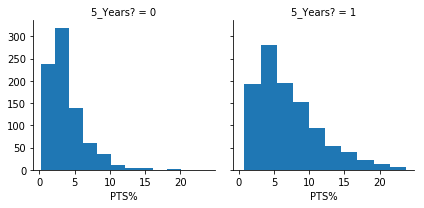

In [140]:
g = sns.FacetGrid(df, col = '5_Years?')
g.map(plt.hist, 'PTS%')

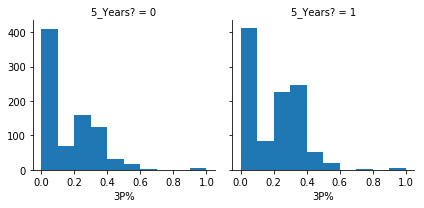

In [142]:
g = sns.FacetGrid(df, col = '5_Years?')
g.map(plt.hist,'3P%')

### Observations
* 3P percentage has a slight influence on longevity.  However, 

### Observations
* Naturally, most players who don't make it past 5 years have lower scoring stats
* Very few players who average over 10 points during their rookie year last less than 5 years in the NBA

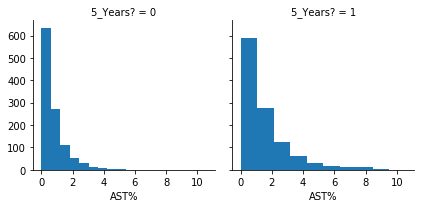

In [20]:
k = sns.FacetGrid(df, col = '5_Years?')
k.map(plt.hist, 'AST%')

### Observations
* PLayers with more assists seem to last much longer in the league than those who don't.
* However, histogram demonstrates that most players aren't heavily involved in providing assists.  

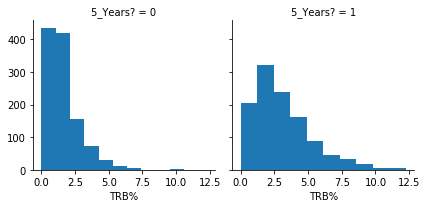

In [21]:
g = sns.FacetGrid(df, col = '5_Years?')
g.map(plt.hist, 'TRB%')

### Observations
* Surprisingly, total rebounds have just as much of an impact on predicting longevity of a player's career as scoring
* This possibly suggests height is critical in determining longevity

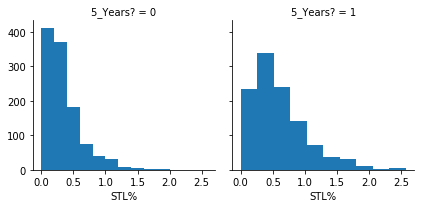

In [22]:
g = sns.FacetGrid(df, col = '5_Years?')
g.map(plt.hist, 'STL%')

### Observations
* Most players who don't last in the nba aren't getting steals.  

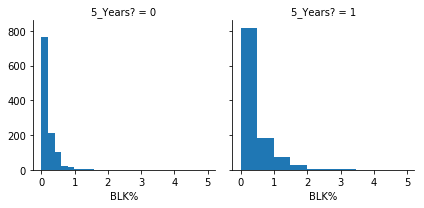

In [23]:
g = sns.FacetGrid(df, col = '5_Years?')
g.map(plt.hist, 'BLK%')

### Observations
* Blocks don't have much influence on whether a player remains relevant in the league.

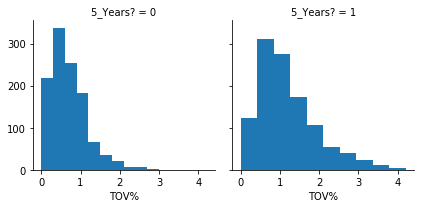

In [24]:
g = sns.FacetGrid(df, col = '5_Years?')
g.map(plt.hist, 'TOV%')

### Observations
* surprisingly, histogram suggests more turnovers is better for a player's longevity.  Likely has connection to minutes played during rookie year

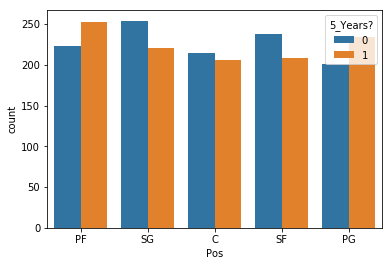

In [26]:
sns.countplot(x = "Pos", hue = "5_Years?", data = df)

### Observations
* As we can see, position doesn't have much influence on whether a player stays or doesn't.

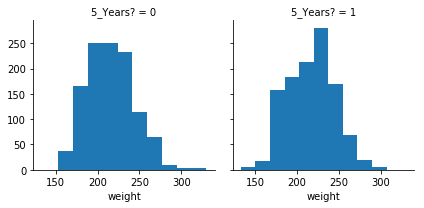

In [27]:
g = sns.FacetGrid(df, col = '5_Years?')
g.map(plt.hist, 'weight')

### Observations
* Weight also doesn't have much influence on whether a player stays

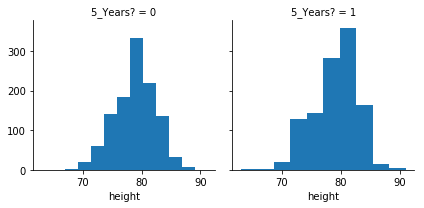

In [118]:
g = sns.FacetGrid(df, col = '5_Years?')
g.map(plt.hist, 'height')

### Observations
* Like weight, height doesn't have much influence.

# Regression Model

We will keep data relevant to our model based on the data analysis performed above

In [150]:
X = df[['PTS%','TRB%','AST%','STL%','TOV%', '3P%']]
y = df['5_Years?']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33)
clf = LogisticRegression()
clf.fit(X_train, y_train)
score = round(clf.score(X_train,y_train)*100,2)
print(score)

68.78
